# CNN ON CYBER BULLYING TRAINING ON 012DATA.csv AND VALIDATION WITH dev.csv

In [1]:
import warnings

In [2]:
from keras.preprocessing.text import one_hot
#from keras.preprocessing.text import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [4]:
from keras.utils.vis_utils import plot_model
import numpy as np
from numpy import asarray
from numpy import zeros
from keras.utils.vis_utils import plot_model
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
from keras import backend as K
#K.set_image_data_format('th')
from keras.preprocessing import sequence
from keras.layers import Conv1D, MaxPooling1D
#from laplotter import LossAccPlotter

In [6]:
df1 = pd.read_csv('D:\CNN\Dataset/012DATA.csv')
df2 = pd.read_csv('D:\CNN\Dataset/dev.csv')

In [7]:
df= df2['label']
y_val=df.replace({'NAG': 0, 'CAG': 1, 'OAG': 2})
raw_val=df2['comment']
raw_train = df1['comment']
y_train = df1['label']

In [8]:
tk=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=" ")
tk.fit_on_texts(raw_train)
tk.fit_on_texts(raw_val)
index=tk.word_index
#print(index)

In [13]:
vocab_size = len(index)
#vocab_size=50
print (vocab_size)
encoded_docs_train=[one_hot(d,vocab_size) for d in raw_train]
encoded_docs_val=[one_hot(d,vocab_size) for d in raw_val]


26800


In [14]:
from keras.preprocessing.sequence import pad_sequences
max_length=100
padded_docs_train =pad_sequences(encoded_docs_train, maxlen=max_length, padding='pre')
padded_docs_val =pad_sequences(encoded_docs_val, maxlen=max_length, padding='pre')
#print (padded_docs)


In [15]:
x_train = padded_docs_train
x_val =  padded_docs_val

In [20]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(11999, 100)
(11999, 3)
(3001, 100)
(3001, 3)


In [23]:
from prf1 import f1_score,precision,recall  

In [24]:

model = Sequential()
model.add(Dense(1024, input_shape=(100,)))

#model.add(Dense(1024,  activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',f1_score,precision,recall])
#data = np.array([x for x in range(0,1000)])


In [25]:
 history=model.fit(x_train, y_train,
          batch_size=50,    
          epochs=25,
          verbose=1,
          validation_data=(x_val, y_val))


Train on 11999 samples, validate on 3001 samples
Epoch 1/25
11999/11999 [==============================] - 10s 800us/step - loss: 9.3358 - acc: 0.4208 - f1_score: 0.4208 - precision: 0.4208 - recall: 0.4208 - val_loss: 9.4933 - val_acc: 0.4109 - val_f1_score: 0.4109 - val_precision: 0.4109 - val_recall: 0.4109
Epoch 2/25
11999/11999 [==============================] - 6s 505us/step - loss: 9.3332 - acc: 0.4210 - f1_score: 0.4210 - precision: 0.4210 - recall: 0.4210 - val_loss: 9.4933 - val_acc: 0.4109 - val_f1_score: 0.4109 - val_precision: 0.4109 - val_recall: 0.4109
Epoch 3/25
11999/11999 [==============================] - 6s 515us/step - loss: 9.3332 - acc: 0.4210 - f1_score: 0.4210 - precision: 0.4210 - recall: 0.4210 - val_loss: 9.4933 - val_acc: 0.4109 - val_f1_score: 0.4109 - val_precision: 0.4109 - val_recall: 0.4109
Epoch 4/25
11999/11999 [==============================] - 6s 529us/step - loss: 9.3332 - acc: 0.4210 - f1_score: 0.4210 - precision: 0.4210 - recall: 0.4210 - val_l

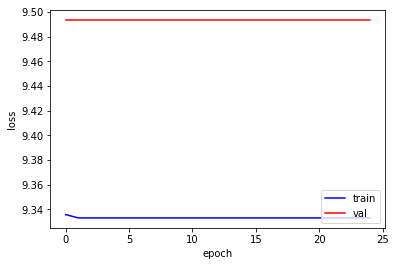

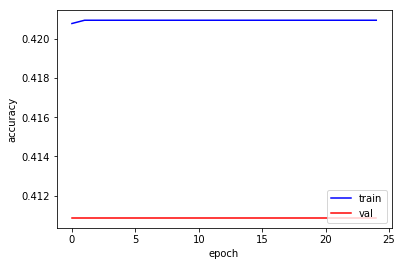

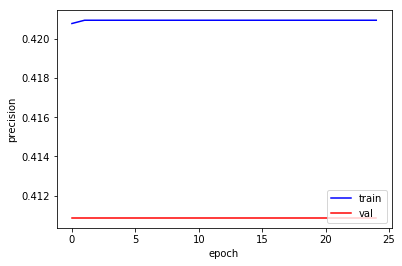

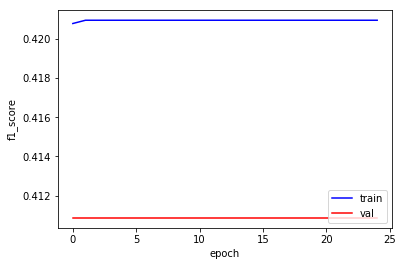

In [27]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], color='b')
pyplot.plot(history.history['val_loss'], color='r')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
pyplot.show()
pyplot.plot(history.history['acc'], color='b')
pyplot.plot(history.history['val_acc'], color='r')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
pyplot.show()
pyplot.plot(history.history['precision'], color='b')
pyplot.plot(history.history['val_precision'], color='r')
pyplot.ylabel('precision')
pyplot.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
pyplot.show()
pyplot.plot(history.history['f1_score'], color='b')
pyplot.plot(history.history['val_f1_score'], color='r')
pyplot.ylabel('f1_score')
pyplot.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
pyplot.show()
